<a href="https://colab.research.google.com/github/flavioyamada/tcc_covid19/blob/main/projeto_covid19_IFSP_JCR_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas + XLRD

---

In [ ]:
import requests
import os
import zipfile
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import sys
import shutil
import seaborn as sns
import re

In [ ]:
mydir= '/usr/local/lib/python3.7/dist-packages/xlrd-1.1.0.dist-info'

try:
    shutil.rmtree(mydir)
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

Error: /usr/local/lib/python3.7/dist-packages/xlrd-1.1.0.dist-info - No such file or directory.


In [ ]:
!pip install xlrd

# Export dos dados

---

In [ ]:
dirName = 'dados_zip'
dirName2 = 'tabelas'

try:
    os.mkdir(dirName)
    print("Directory " , dirName," Created ")
except FileExistsError:
    print("Directory " , dirName ," already exists")
try:
    os.mkdir(dirName2)
    print("Directory " , dirName2," Created ")
except FileExistsError:
    print("Directory " , dirName2 ," already exists")

Directory  dados_zip  Created 
Directory  tabelas  Created 


In [ ]:
def baixar_arquivo(url, endereco):
  #faz a requisicao ao servidor
    resposta = requests.get(url)
    if resposta.status_code == requests.codes.OK:
      with open(endereco, 'wb') as novo_arquivo:
        novo_arquivo.write(resposta.content)
      print("Download realizado com sucesso! Salvo em: {}".format(endereco))
    else:
      resposta.raise_for_status()

In [ ]:
if __name__ == "__main__":
  URL_PADRAO = 'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/{}'
  #REQUEST
  baixar_arquivo(URL_PADRAO.format('Resultados_do_Universo/xls/Municipios/sao_paulo_20190207.zip'), '/content/dados_zip/conjunto1.zip')
  baixar_arquivo(URL_PADRAO.format('Educacao_e_Deslocamento/xls/sao_paulo_xls.zip'), '/content/dados_zip/conjunto2.zip')
  baixar_arquivo(('https://raw.githubusercontent.com/flavioyamada/tcc_covid19/main/bd/educacao_ideb_mun.csv'), '/content/educacao_ideb_mun.csv')
  baixar_arquivo(('https://raw.githubusercontent.com/flavioyamada/tcc_covid19/main/bd/econ_pib.csv'), '/content/econ_pib.csv')
  baixar_arquivo('https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv.zip','/content/dados_zip/conjunto3.zip')

Download realizado com sucesso! Salvo em: /content/dados_zip/conjunto1.zip
Download realizado com sucesso! Salvo em: /content/dados_zip/conjunto2.zip
Download realizado com sucesso! Salvo em: /content/educacao_ideb_mun.csv
Download realizado com sucesso! Salvo em: /content/econ_pib.csv
Download realizado com sucesso! Salvo em: /content/dados_zip/conjunto3.zip


In [ ]:
qtd_pastas = 3

for i in range(qtd_pastas):
  if not os.path.isdir('/content/tabelas/tabela{}'.format(i+1)):
    os.mkdir('/content/tabelas/tabela{}'.format(i+1))

for i in range(qtd_pastas):
  with zipfile.ZipFile('/content/dados_zip/conjunto{}.zip'.format(i+1),"r") as zip_ref:
      zip_ref.extractall("/content/tabelas/tabela{}".format(i+1))

# Tratamento de tabelas

---



In [ ]:
columns = ['nome_munic','total_geral', 'total_tinham', 'rede_esgoto', 'fossa_septica','outro','nao_tinham', 'Cod. Unidade geografica']
df = pd.read_excel('/content/tabelas/tabela1/Tabela 4.20.5.3.xls', skiprows = 89, skipfooter=2)
df.columns = columns
df

,nome_munic,total_geral,total_tinham,rede_esgoto,fossa_septica,outro,nao_tinham,Cod. Unidade geografica
0,Adamantina,11328,11319,10704,164,451,9,3.500105e+06
1,Adamantina,11328,11319,10704,164,451,9,3.500105e+08
2,Adolfo,1200,1200,1037,96,67,-,3.500204e+06
3,Adolfo,1200,1200,1037,96,67,-,3.500204e+08
4,Aguaí,9881,9872,8854,91,927,9,3.500303e+06
...,...,...,...,...,...,...,...,...
3654,Taquaral,290,290,9,269,12,-,3.555406e+09
3655,Tenório (Praia Vermelha),108,108,19,89,-,-,3.555406e+09
3656,"Toninhas (Praias Godói, Xanda e Fora)",309,309,265,33,11,-,3.555406e+09
3657,Ubatumirim,54,54,2,52,-,-,3.555406e+09


In [ ]:
amostra_ibge = df[['nome_munic', 'rede_esgoto','fossa_septica','outro','nao_tinham']]
amostra_ibge.drop_duplicates()

,nome_munic,rede_esgoto,fossa_septica,outro,nao_tinham
0,Adamantina,10704,164,451,9
2,Adolfo,1037,96,67,-
4,Aguaí,8854,91,927,9
6,Águas da Prata,1987,159,359,1
7,Águas da Prata,1537,137,213,1
...,...,...,...,...,...
3654,Taquaral,9,269,12,-
3655,Tenório (Praia Vermelha),19,89,-,-
3656,"Toninhas (Praias Godói, Xanda e Fora)",265,33,11,-
3657,Ubatumirim,2,52,-,-


In [ ]:
df2 = pd.read_csv('/content/tabelas/tabela3/dados_covid_sp.csv', sep =';')
df2

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715117,Ignorado,9999999,3,3,2023-03-03,377,-73,"0,00000000000000e+00","-38,571428571428569",4,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",9
715118,Ignorado,9999999,4,3,2023-03-04,382,5,"0,00000000000000e+00","-25,000000000000000",4,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",9
715119,Ignorado,9999999,5,3,2023-03-05,328,-54,"0,00000000000000e+00","-30,428571428571427",4,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",10
715120,Ignorado,9999999,6,3,2023-03-06,322,-6,"0,00000000000000e+00","-29,714285714285715",4,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",10


In [ ]:
amostra_covid = df2[['nome_munic','pop','datahora','obitos']]
amostra_covid

,nome_munic,pop,datahora,obitos
0,Adamantina,33894,2020-02-25,0
1,Adolfo,3447,2020-02-25,0
2,Aguaí,35608,2020-02-25,0
3,Águas da Prata,7797,2020-02-25,0
4,Águas de Lindóia,18374,2020-02-25,0
...,...,...,...,...
715117,Ignorado,0,2023-03-03,4
715118,Ignorado,0,2023-03-04,4
715119,Ignorado,0,2023-03-05,4
715120,Ignorado,0,2023-03-06,4


In [ ]:
amostra_covid = df2['datahora']=pd.to_datetime(df2['datahora'])
amostra_covid = df2['periodo']=np.where(df2['datahora'].between('2/26/2020','8/26/2020'),'six_month','post')
amostra_covid = df2.groupby(['nome_munic','pop','periodo'])['obitos'].mean().to_frame('obitos_mean')
amostra_covid

obitos_mean
nome_munic         pop   periodo               
Adamantina         33894 post        120.327922
                         six_month     2.508197
Adolfo             3447  post         17.257576
                         six_month     0.918033
Aguaí              35608 post         92.542208
...                                         ...
Álvares Machado    23789 six_month     1.065574
Álvaro de Carvalho 5044  post          7.757576
                         six_month     1.191257
Óleo               2527  post          3.530303
                         six_month     0.000000

[1292 rows x 1 columns]

In [ ]:
df = amostra_covid.unstack().reset_index()
df.columns = ['nome_munic','pop','more_1year','6months']
df

,nome_munic,pop,more_1year,6months
0,Adamantina,33894,120.327922,2.508197
1,Adolfo,3447,17.257576,0.918033
2,Aguaí,35608,92.542208,2.475410
3,Agudos,36134,88.341991,2.049180
4,Alambari,5779,10.193723,0.000000
...,...,...,...,...
641,Águas de São Pedro,3122,10.384199,0.000000
642,Álvares Florence,3621,13.757576,0.256831
643,Álvares Machado,23789,62.436147,1.065574
644,Álvaro de Carvalho,5044,7.757576,1.191257


In [ ]:
df_edu = pd.read_csv('/content/educacao_ideb_mun.csv',sep =';',encoding='latin-1')
df_edu = df_edu[['Localidade','Rede', 'SAEB - 2019', 'IDEB 2019','Anos']]
df_edu

,Localidade,Rede,SAEB - 2019,IDEB 2019,Anos
0,Estado São Paulo,Total,"6,83","6,7",1º ao 5º ano
1,Estado São Paulo,Pública,"6,62","6,5",1º ao 5º ano
2,Estado São Paulo,Privada,"7,67","7,6",1º ao 5º ano
3,Estado São Paulo,Estadual,"6,66","6,6",1º ao 5º ano
4,Estado São Paulo,Total,"5,67","5,5",6º ao 9º ano
...,...,...,...,...,...
4367,Zacarias,Pública,NaN,NaN,Ensino médio
4368,Chavantes,Estadual,NaN,NaN,Ensino médio
4369,Chavantes,Pública,NaN,NaN,Ensino médio
4370,Estiva Gerbi,Estadual,NaN,NaN,Ensino médio


In [ ]:
df_edu = df_edu.loc[(df_edu['Rede'] == 'Pública') & (df_edu['Anos'] == 'Ensino médio')]
df_edu = df_edu.rename(columns = {'Localidade':'nome_munic'})
df_edu

,nome_munic,Rede,SAEB - 2019,IDEB 2019,Anos
10,Estado São Paulo,Pública,"4,71","4,3",Ensino médio
3035,Adamantina,Pública,"5,02","4,9",Ensino médio
3037,Adolfo,Pública,"4,18","4,1",Ensino médio
3039,Aguaí,Pública,"5,04","4,7",Ensino médio
3041,Águas da Prata,Pública,"4,85","4,6",Ensino médio
...,...,...,...,...,...
4362,Votorantim,Pública,"4,87","4,7",Ensino médio
4365,Votuporanga,Pública,"5,18","5,0",Ensino médio
4367,Zacarias,Pública,NaN,NaN,Ensino médio
4369,Chavantes,Pública,NaN,NaN,Ensino médio


In [ ]:
df_edu = df_edu[['nome_munic','SAEB - 2019','IDEB 2019']]
df_edu

,nome_munic,SAEB - 2019,IDEB 2019
10,Estado São Paulo,"4,71","4,3"
3035,Adamantina,"5,02","4,9"
3037,Adolfo,"4,18","4,1"
3039,Aguaí,"5,04","4,7"
3041,Águas da Prata,"4,85","4,6"
...,...,...,...
4362,Votorantim,"4,87","4,7"
4365,Votuporanga,"5,18","5,0"
4367,Zacarias,NaN,NaN
4369,Chavantes,NaN,NaN


In [ ]:
df_pib = pd.read_csv('/content/econ_pib.csv', sep = ';', encoding='latin-1')
df_pib = df_pib.loc[(df_pib['Setor'] == 'PIB per capita')]
df_pib

,Cod_Ibge,Localidade,Setor,Ano,Valor
5167,35,Estado de São Paulo,PIB per capita,2019,R$52.992
5168,3500105,Adamantina,PIB per capita,2019,R$33.526
5169,3500204,Adolfo,PIB per capita,2019,R$32.206
5170,3500303,Aguaí,PIB per capita,2019,R$29.086
5171,3500402,Águas da Prata,PIB per capita,2019,R$21.916
...,...,...,...,...,...
5808,3556909,Vista Alegre do Alto,PIB per capita,2019,R$33.902
5809,3556958,Vitória Brasil,PIB per capita,2019,R$20.561
5810,3557006,Votorantim,PIB per capita,2019,R$28.696
5811,3557105,Votuporanga,PIB per capita,2019,R$32.421


In [ ]:
df_pib = df_pib[['Localidade','Valor']]
df_pib = df_pib.rename(columns = {'Localidade':'nome_munic'})
df_pib = df_pib.rename(columns = {'Valor':'PIB per capita'})
df_pib

,nome_munic,PIB per capita
5167,Estado de São Paulo,R$52.992
5168,Adamantina,R$33.526
5169,Adolfo,R$32.206
5170,Aguaí,R$29.086
5171,Águas da Prata,R$21.916
...,...,...
5808,Vista Alegre do Alto,R$33.902
5809,Vitória Brasil,R$20.561
5810,Votorantim,R$28.696
5811,Votuporanga,R$32.421


# Merge

In [ ]:
amostra_covid = pd.merge(amostra_ibge, df, on ='nome_munic')
amostra_covid = amostra_covid.drop_duplicates('nome_munic')
amostra_covid = amostra_covid.replace("-", None)
amostra_covid = pd.merge(amostra_covid, df_edu, on = 'nome_munic')
amostra_covid = pd.merge(amostra_covid, df_pib, on = 'nome_munic')

In [ ]:
amostra_covid['SAEB - 2019'] = amostra_covid['SAEB - 2019'].str.replace(',', '.')
amostra_covid['IDEB 2019'] = amostra_covid['IDEB 2019'].str.replace(',', '.')
amostra_covid

,nome_munic,rede_esgoto,fossa_septica,outro,nao_tinham,pop,more_1year,6months,SAEB - 2019,IDEB 2019,PIB per capita
0,Adamantina,10704,164,451,9,33894,120.327922,2.508197,5.02,4.9,R$33.526
1,Adolfo,1037,96,67,None,3447,17.257576,0.918033,4.18,4.1,R$32.206
2,Aguaí,8854,91,927,9,35608,92.542208,2.475410,5.04,4.7,R$29.086
3,Águas da Prata,1987,159,359,1,7797,25.372294,0.316940,4.85,4.6,R$21.916
4,Águas de Lindóia,5006,212,371,6,18374,43.774892,2.032787,5.38,5.0,R$29.065
...,...,...,...,...,...,...,...,...,...,...,...
633,Vista Alegre do Alto,1924,18,141,3,8014,15.518398,0.912568,5.02,5.0,R$33.902
634,Vitória Brasil,449,6,103,None,1760,7.097403,0.000000,4.63,4.5,R$20.561
635,Votorantim,30192,595,1143,23,119824,420.187229,16.715847,4.87,4.7,R$28.696
636,Votuporanga,28056,235,839,14,91760,381.305195,12.601093,5.18,5.0,R$32.421


In [ ]:
amostra_covid['PIB per capita'] = amostra_covid['PIB per capita'].str.replace('[R$]','')
amostra_covid

<ipython-input-53-b2d99e30cb07>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  amostra_covid['PIB per capita'] = amostra_covid['PIB per capita'].str.replace('[R$]','')


,nome_munic,rede_esgoto,fossa_septica,outro,nao_tinham,pop,more_1year,6months,SAEB - 2019,IDEB 2019,PIB per capita
0,Adamantina,10704,164,451,9,33894,120.327922,2.508197,5.02,4.9,33.526
1,Adolfo,1037,96,67,None,3447,17.257576,0.918033,4.18,4.1,32.206
2,Aguaí,8854,91,927,9,35608,92.542208,2.475410,5.04,4.7,29.086
3,Águas da Prata,1987,159,359,1,7797,25.372294,0.316940,4.85,4.6,21.916
4,Águas de Lindóia,5006,212,371,6,18374,43.774892,2.032787,5.38,5.0,29.065
...,...,...,...,...,...,...,...,...,...,...,...
633,Vista Alegre do Alto,1924,18,141,3,8014,15.518398,0.912568,5.02,5.0,33.902
634,Vitória Brasil,449,6,103,None,1760,7.097403,0.000000,4.63,4.5,20.561
635,Votorantim,30192,595,1143,23,119824,420.187229,16.715847,4.87,4.7,28.696
636,Votuporanga,28056,235,839,14,91760,381.305195,12.601093,5.18,5.0,32.421


In [ ]:
for column in amostra_covid.columns[1:]:
      amostra_covid[column] = amostra_covid[column].astype(float)

In [ ]:
amostra_covid['taxa_obitos6meses'] = (amostra_covid['6months'] / amostra_covid['pop'])*100000
amostra_covid['taxa_obitos1ano'] = (amostra_covid['more_1year'] / amostra_covid['pop'])*100000
amostra_covid

,nome_munic,rede_esgoto,fossa_septica,outro,nao_tinham,pop,more_1year,6months,SAEB - 2019,IDEB 2019,PIB per capita,taxa_obitos6meses,taxa_obitos1ano
0,Adamantina,10704.0,164.0,451.0,9.0,33894.0,120.327922,2.508197,5.02,4.9,33.526,7.400120,355.012457
1,Adolfo,1037.0,96.0,67.0,NaN,3447.0,17.257576,0.918033,4.18,4.1,32.206,26.632805,500.654939
2,Aguaí,8854.0,91.0,927.0,9.0,35608.0,92.542208,2.475410,5.04,4.7,29.086,6.951836,259.891619
3,Águas da Prata,1987.0,159.0,359.0,1.0,7797.0,25.372294,0.316940,4.85,4.6,21.916,4.064895,325.410983
4,Águas de Lindóia,5006.0,212.0,371.0,6.0,18374.0,43.774892,2.032787,5.38,5.0,29.065,11.063388,238.243669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Vista Alegre do Alto,1924.0,18.0,141.0,3.0,8014.0,15.518398,0.912568,5.02,5.0,33.902,11.387176,193.641106
634,Vitória Brasil,449.0,6.0,103.0,NaN,1760.0,7.097403,0.000000,4.63,4.5,20.561,0.000000,403.261511
635,Votorantim,30192.0,595.0,1143.0,23.0,119824.0,420.187229,16.715847,4.87,4.7,28.696,13.950333,350.670341
636,Votuporanga,28056.0,235.0,839.0,14.0,91760.0,381.305195,12.601093,5.18,5.0,32.421,13.732664,415.546202


# Analise descritiva

---




In [ ]:
amostra_covid.dtypes

nome_munic            object
rede_esgoto          float64
fossa_septica        float64
outro                float64
nao_tinham           float64
pop                  float64
more_1year           float64
6months              float64
SAEB - 2019          float64
IDEB 2019            float64
PIB per capita       float64
taxa_obitos6meses    float64
taxa_obitos1ano      float64
dtype: object

In [ ]:
#media
amostra_covid.mean()

<ipython-input-58-d09be5b89c7c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  amostra_covid.mean()


rede_esgoto          17331.338558
fossa_septica          931.882445
outro                 1682.459969
nao_tinham              17.200368
pop                  69323.978056
more_1year             202.605440
6months                 15.155301
SAEB - 2019              4.823206
IDEB 2019                4.549129
PIB per capita          35.700538
taxa_obitos6meses        8.198196
taxa_obitos1ano        262.572524
dtype: float64

In [ ]:
#comparacao
comp = pd.DataFrame()
comp['mean'] = amostra_covid.mean()
comp['median'] = amostra_covid.median()
comp

<ipython-input-59-94932077bf9d>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  comp['mean'] = amostra_covid.mean()
<ipython-input-59-94932077bf9d>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  comp['median'] = amostra_covid.median()


,mean,median
rede_esgoto,17331.338558,2880.500000
fossa_septica,931.882445,179.000000
outro,1682.459969,391.000000
nao_tinham,17.200368,5.000000
pop,69323.978056,13420.000000
more_1year,202.605440,33.123918
6months,15.155301,0.699454
SAEB - 2019,4.823206,4.840000
IDEB 2019,4.549129,4.600000
PIB per capita,35.700538,26.574500


In [ ]:
#moda
amostra_covid.mode()

,nome_munic,rede_esgoto,fossa_septica,outro,nao_tinham,pop,more_1year,6months,SAEB - 2019,IDEB 2019,PIB per capita,taxa_obitos6meses,taxa_obitos1ano
0,Adamantina,539.0,5.0,101.0,2.0,3892.0,15.070346,0.0,5.1,4.6,15.788,0.0,43.306301
1,Adolfo,633.0,NaN,NaN,NaN,7749.0,22.980519,NaN,NaN,NaN,15.916,NaN,49.894879
2,Aguaí,788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.724,NaN,64.574596
3,Agudos,950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.523,NaN,65.327859
4,Alambari,1025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.372,NaN,67.536022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Águas de São Pedro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590.544505
634,Álvares Florence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689.547821
635,Álvares Machado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.323628
636,Álvaro de Carvalho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.452640


<Axes: ylabel='Density'>

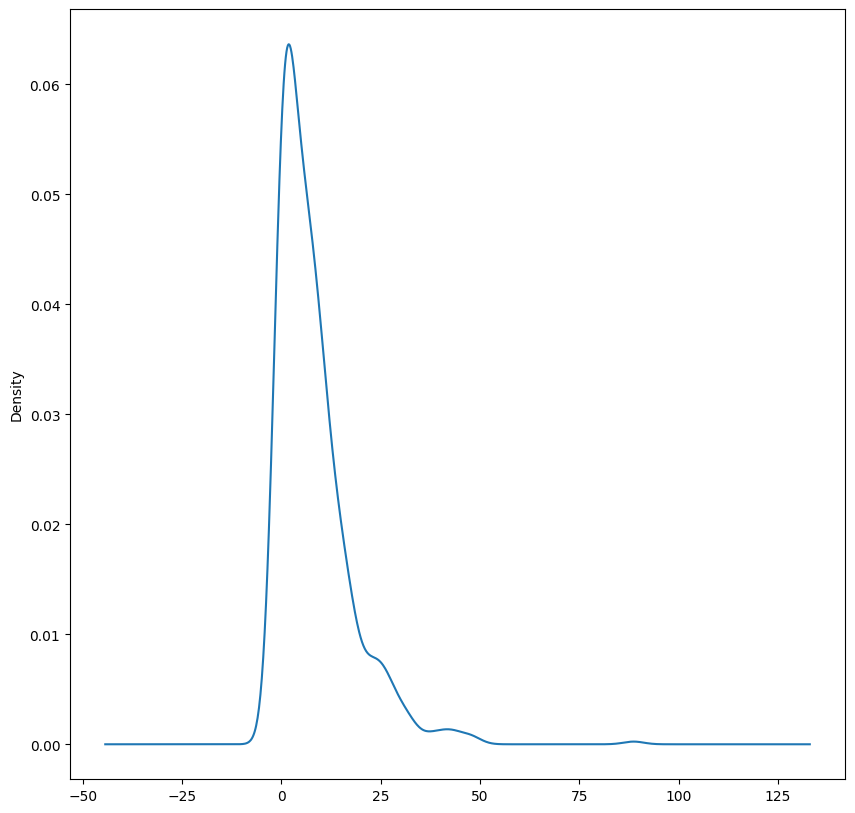

In [ ]:
#distribuicao
amostra_covid['taxa_obitos6meses'].plot(kind='density', figsize = (10,10))

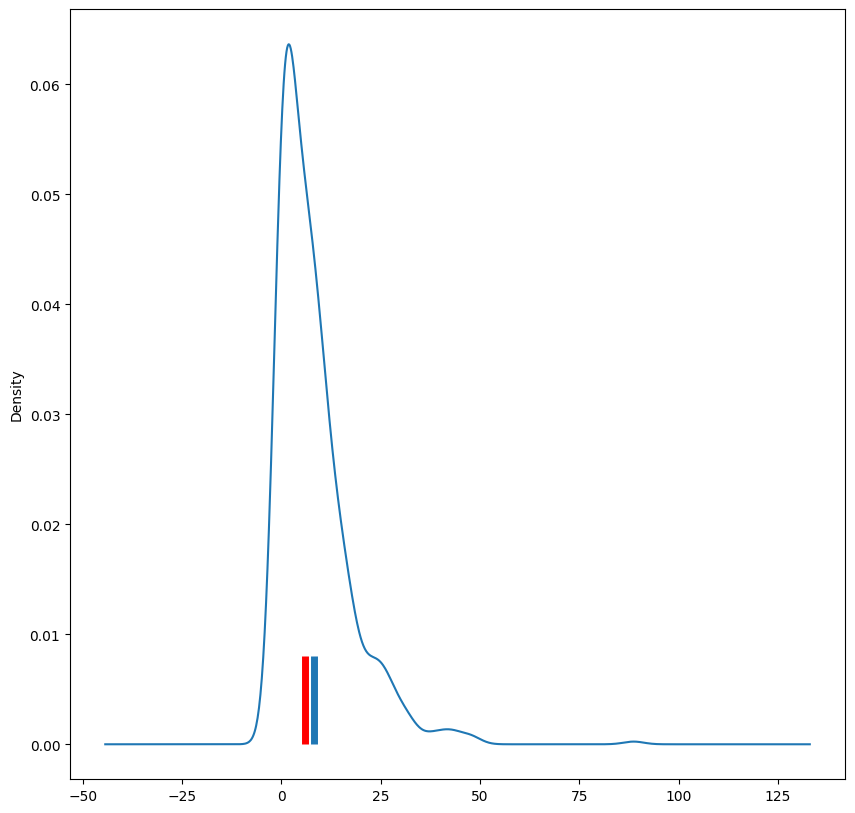

In [ ]:
amostra_covid['taxa_obitos6meses'].plot(kind='density', figsize = (10,10))
#media
plt.vlines(amostra_covid['taxa_obitos6meses'].mean(),ymin=0,ymax=0.008,linewidth=5.0)
#mediana
plt.vlines(amostra_covid['taxa_obitos6meses'].median(),ymin=0,ymax=0.008,linewidth=5.0,color='red')

In [ ]:
#variacao
max(amostra_covid['6months']) - min(amostra_covid['6months'])

4454.595628415301

In [ ]:
#quartis
quartis = [amostra_covid['6months'].quantile(0), amostra_covid['6months'].quantile(0.25),
          amostra_covid['6months'].quantile(0.50),
          amostra_covid['6months'].quantile(0.75),
          amostra_covid['6months'].quantile(1)]
quartis

[0.0,
 0.12021857923497267,
 0.6994535519125683,
 2.9262295081967213,
 4454.595628415301]

In [ ]:
#variancia
amostra_covid.var()

<ipython-input-65-791ea6b7ab58>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  amostra_covid.var()


rede_esgoto          1.768092e+10
fossa_septica        1.005264e+07
outro                9.209607e+07
nao_tinham           4.049236e+03
pop                  2.330204e+11
more_1year           1.950615e+06
6months              3.195517e+04
SAEB - 2019          1.162302e-01
IDEB 2019            1.530446e-01
PIB per capita       1.505308e+03
taxa_obitos6meses    8.673744e+01
taxa_obitos1ano      1.023824e+04
dtype: float64

In [ ]:
#desvio padrao
amostra_covid.std()

<ipython-input-66-a432c22666ef>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  amostra_covid.std()


rede_esgoto          132969.635001
fossa_septica          3170.589542
outro                  9596.669832
nao_tinham               63.633608
pop                  482721.841181
more_1year             1396.644147
6months                 178.760084
SAEB - 2019               0.340925
IDEB 2019                 0.391209
PIB per capita           38.798294
taxa_obitos6meses         9.313294
taxa_obitos1ano         101.184165
dtype: float64

In [ ]:
#Erro padrao
amostra_covid.sem()

<ipython-input-67-401b293d3bc1>:2: FutureWarning: The default value of numeric_only in DataFrame.sem is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  amostra_covid.sem()


rede_esgoto           5264.318262
fossa_septica          125.524842
outro                  380.233903
nao_tinham               2.728268
pop                  19111.140703
more_1year              55.293671
6months                  7.077180
SAEB - 2019              0.014230
IDEB 2019                0.016329
PIB per capita           1.536039
taxa_obitos6meses        0.368717
taxa_obitos1ano          4.005919
dtype: float64

<ipython-input-68-33ecbae85e42>:1: FutureWarning: The default value of numeric_only in DataFrame.sem is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  amostra_covid.sem().plot()


<Axes: >

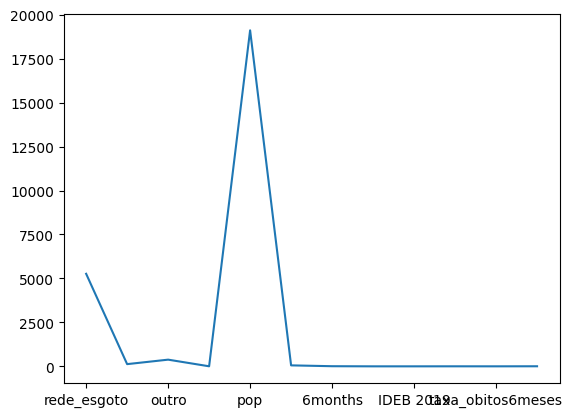

In [ ]:
amostra_covid.sem().plot()

In [ ]:
#skewness
amostra_covid.skew()

<ipython-input-69-346242ace9fe>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  amostra_covid.skew()


rede_esgoto          23.396311
fossa_septica        11.611360
outro                21.342422
nao_tinham           18.834262
pop                  23.082416
more_1year           22.440999
6months              24.158672
SAEB - 2019          -0.288420
IDEB 2019            -0.319857
PIB per capita        6.126464
taxa_obitos6meses     2.383779
taxa_obitos1ano       0.833579
dtype: float64

In [ ]:
#curtose
amostra_covid.kurt()

<ipython-input-70-fe0322a1baf4>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  amostra_covid.kurt()


rede_esgoto          573.923298
fossa_septica        192.943074
outro                502.565002
nao_tinham           404.170584
pop                  563.045576
more_1year           540.705200
6months              599.866010
SAEB - 2019            0.913696
IDEB 2019              1.055312
PIB per capita        46.932350
taxa_obitos6meses     10.756391
taxa_obitos1ano        2.185455
dtype: float64

# Resumido - Describe

In [ ]:
amostra_covid.describe()

,rede_esgoto,fossa_septica,outro,nao_tinham,pop,more_1year,6months,SAEB - 2019,IDEB 2019,PIB per capita,taxa_obitos6meses,taxa_obitos1ano
count,6.380000e+02,638.000000,637.000000,544.000000,6.380000e+02,638.000000,638.000000,574.000000,574.000000,638.000000,638.000000,638.000000
mean,1.733134e+04,931.882445,1682.459969,17.200368,6.932398e+04,202.605440,15.155301,4.823206,4.549129,35.700538,8.198196,262.572524
std,1.329696e+05,3170.589542,9596.669832,63.633608,4.827218e+05,1396.644147,178.760084,0.340925,0.391209,38.798294,9.313294,101.184165
min,6.600000e+01,1.000000,1.000000,1.000000,8.120000e+02,0.784632,0.000000,3.120000,2.600000,9.221000,0.000000,43.306301
25%,1.131750e+03,55.250000,181.000000,2.000000,5.548250e+03,13.092262,0.120219,4.602500,4.300000,20.183250,1.283470,200.007926
50%,2.880500e+03,179.000000,391.000000,5.000000,1.342000e+04,33.123918,0.699454,4.840000,4.600000,26.574500,5.869021,252.342780
75%,9.254500e+03,487.500000,1047.000000,16.000000,4.086625e+04,99.481331,2.926230,5.047500,4.800000,38.153250,11.428365,322.699599
max,3.283416e+06,59876.000000,229601.000000,1393.000000,1.186966e+07,34000.165584,4454.595628,5.860000,5.700000,454.012000,88.706128,756.280941


# Relacionamento entre variaveis

---


In [ ]:
#correlacao entre duas variaveis
amostra_covid['pop'].corr(amostra_covid['6months'])

0.9934986650632295

In [ ]:
amostra_covid

,nome_munic,rede_esgoto,fossa_septica,outro,nao_tinham,pop,more_1year,6months,SAEB - 2019,IDEB 2019,PIB per capita,taxa_obitos6meses,taxa_obitos1ano
0,Adamantina,10704.0,164.0,451.0,9.0,33894.0,120.327922,2.508197,5.02,4.9,33.526,7.400120,355.012457
1,Adolfo,1037.0,96.0,67.0,NaN,3447.0,17.257576,0.918033,4.18,4.1,32.206,26.632805,500.654939
2,Aguaí,8854.0,91.0,927.0,9.0,35608.0,92.542208,2.475410,5.04,4.7,29.086,6.951836,259.891619
3,Águas da Prata,1987.0,159.0,359.0,1.0,7797.0,25.372294,0.316940,4.85,4.6,21.916,4.064895,325.410983
4,Águas de Lindóia,5006.0,212.0,371.0,6.0,18374.0,43.774892,2.032787,5.38,5.0,29.065,11.063388,238.243669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Vista Alegre do Alto,1924.0,18.0,141.0,3.0,8014.0,15.518398,0.912568,5.02,5.0,33.902,11.387176,193.641106
634,Vitória Brasil,449.0,6.0,103.0,NaN,1760.0,7.097403,0.000000,4.63,4.5,20.561,0.000000,403.261511
635,Votorantim,30192.0,595.0,1143.0,23.0,119824.0,420.187229,16.715847,4.87,4.7,28.696,13.950333,350.670341
636,Votuporanga,28056.0,235.0,839.0,14.0,91760.0,381.305195,12.601093,5.18,5.0,32.421,13.732664,415.546202


In [ ]:
amostra_covid.corr()

<ipython-input-74-05216fd95b19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  amostra_covid.corr()


,rede_esgoto,fossa_septica,outro,nao_tinham,pop,more_1year,6months,SAEB - 2019,IDEB 2019,PIB per capita,taxa_obitos6meses,taxa_obitos1ano
rede_esgoto,1.000000,0.797668,0.968115,0.962433,0.998987,0.997208,0.994284,-0.005626,-0.051046,0.058989,0.198871,0.044584
fossa_septica,0.797668,1.000000,0.861889,0.819074,0.816802,0.815114,0.793436,-0.017125,-0.082542,0.102896,0.316218,0.012218
outro,0.968115,0.861889,1.000000,0.961175,0.975483,0.970952,0.972657,-0.034523,-0.074240,0.062785,0.234692,0.015826
nao_tinham,0.962433,0.819074,0.961175,1.000000,0.966381,0.964416,0.958475,-0.029721,-0.074561,0.044920,0.270548,0.036708
pop,0.998987,0.816802,0.975483,0.966381,1.000000,0.997966,0.993499,-0.008166,-0.054944,0.064245,0.211019,0.042200
more_1year,0.997208,0.815114,0.970952,0.964416,0.997966,1.000000,0.990085,-0.003532,-0.052296,0.067441,0.226185,0.065292
6months,0.994284,0.793436,0.972657,0.958475,0.993499,0.990085,1.000000,-0.023920,-0.057907,0.054135,0.201246,0.034281
SAEB - 2019,-0.005626,-0.017125,-0.034523,-0.029721,-0.008166,-0.003532,-0.023920,1.000000,0.852737,0.101927,0.093358,0.098621
IDEB 2019,-0.051046,-0.082542,-0.074240,-0.074561,-0.054944,-0.052296,-0.057907,0.852737,1.000000,0.087986,0.028147,0.142425
PIB per capita,0.058989,0.102896,0.062785,0.044920,0.064245,0.067441,0.054135,0.101927,0.087986,1.000000,0.154560,0.031354


In [ ]:
amostra_covid.corr()

<ipython-input-75-05216fd95b19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  amostra_covid.corr()


,rede_esgoto,fossa_septica,outro,nao_tinham,pop,more_1year,6months,SAEB - 2019,IDEB 2019,PIB per capita,taxa_obitos6meses,taxa_obitos1ano
rede_esgoto,1.000000,0.797668,0.968115,0.962433,0.998987,0.997208,0.994284,-0.005626,-0.051046,0.058989,0.198871,0.044584
fossa_septica,0.797668,1.000000,0.861889,0.819074,0.816802,0.815114,0.793436,-0.017125,-0.082542,0.102896,0.316218,0.012218
outro,0.968115,0.861889,1.000000,0.961175,0.975483,0.970952,0.972657,-0.034523,-0.074240,0.062785,0.234692,0.015826
nao_tinham,0.962433,0.819074,0.961175,1.000000,0.966381,0.964416,0.958475,-0.029721,-0.074561,0.044920,0.270548,0.036708
pop,0.998987,0.816802,0.975483,0.966381,1.000000,0.997966,0.993499,-0.008166,-0.054944,0.064245,0.211019,0.042200
more_1year,0.997208,0.815114,0.970952,0.964416,0.997966,1.000000,0.990085,-0.003532,-0.052296,0.067441,0.226185,0.065292
6months,0.994284,0.793436,0.972657,0.958475,0.993499,0.990085,1.000000,-0.023920,-0.057907,0.054135,0.201246,0.034281
SAEB - 2019,-0.005626,-0.017125,-0.034523,-0.029721,-0.008166,-0.003532,-0.023920,1.000000,0.852737,0.101927,0.093358,0.098621
IDEB 2019,-0.051046,-0.082542,-0.074240,-0.074561,-0.054944,-0.052296,-0.057907,0.852737,1.000000,0.087986,0.028147,0.142425
PIB per capita,0.058989,0.102896,0.062785,0.044920,0.064245,0.067441,0.054135,0.101927,0.087986,1.000000,0.154560,0.031354


<ipython-input-76-d899380dd900>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(amostra_covid.corr(), linewidths=.3, annot=True)


<Axes: >

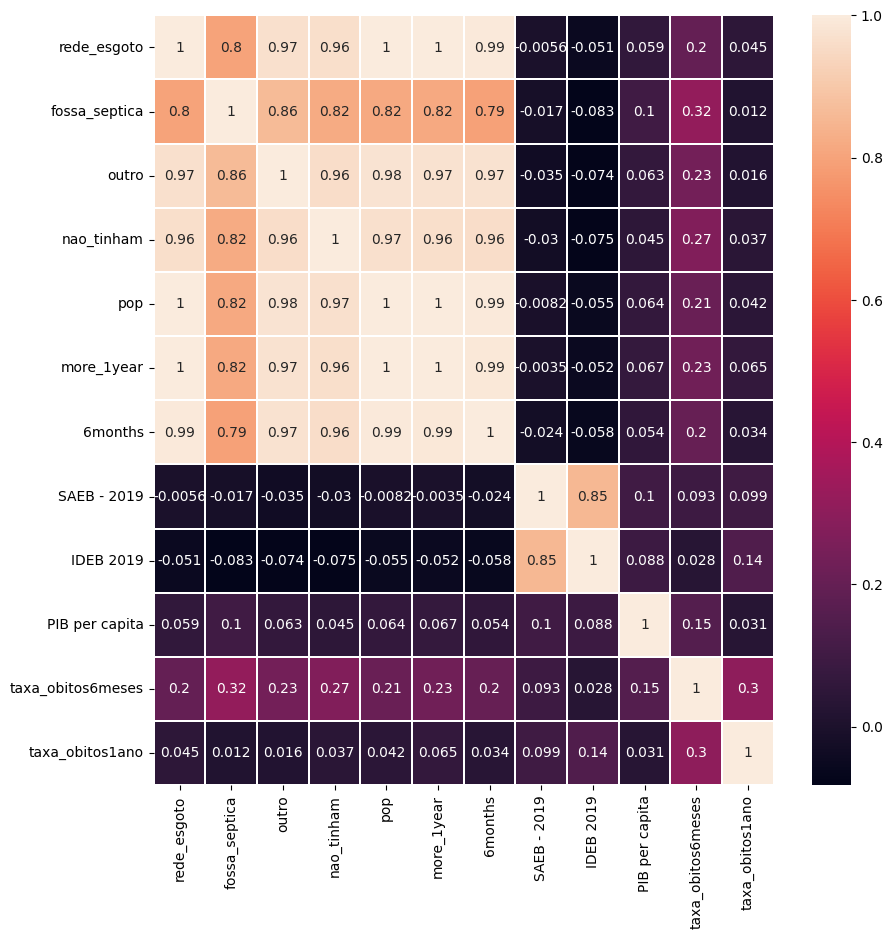

In [ ]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(10, 10))

#create heatmap
sns.heatmap(amostra_covid.corr(), linewidths=.3, annot=True)

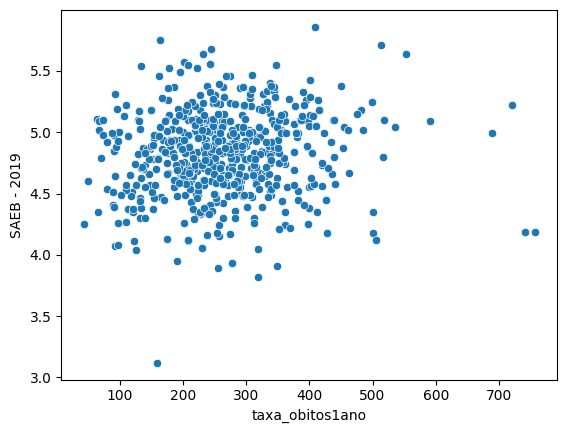

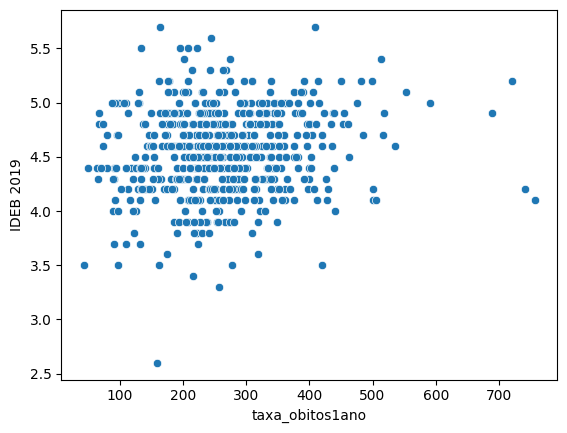

In [ ]:
obitos1anoXsaeb = sns.scatterplot(data=amostra_covid, x='taxa_obitos1ano', y='SAEB - 2019')
plt.show(obitos1anoXsaeb)
obitos1anoXideb = sns.scatterplot(data=amostra_covid, x='taxa_obitos1ano', y='IDEB 2019')
plt.show(obitos1anoXideb)

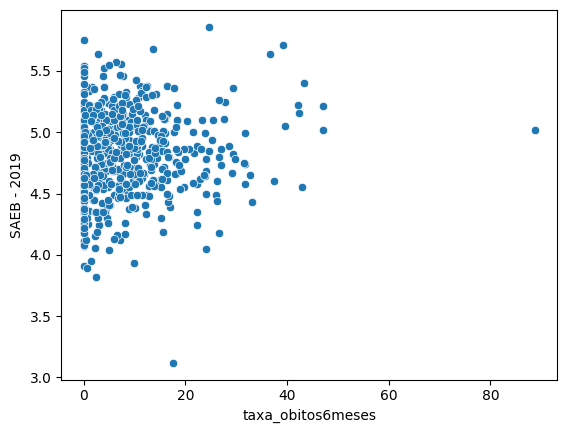

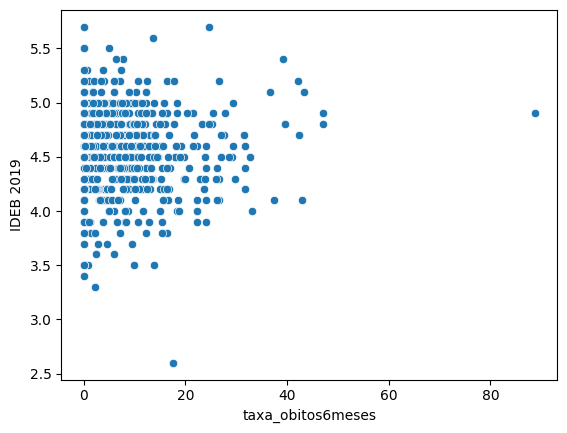

In [ ]:
obitos6mesesXideb = sns.scatterplot(data=amostra_covid, x='taxa_obitos6meses', y='SAEB - 2019')
plt.show(obitos6mesesXideb)
obitos1anoXideb = sns.scatterplot(data=amostra_covid, x='taxa_obitos6meses', y='IDEB 2019')
plt.show(obitos6mesesXideb)

#  MINE - MIC

In [ ]:
!pip install minepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=226817 sha256=0f9ac755741e3bdcf0809ed6e8d54b1f2dd59f61010e0e22de8e7e5e586df837
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


In [ ]:
from minepy import MINE

In [ ]:
del amostra_covid['more_1year']
del amostra_covid['6months']

In [ ]:
amostra_covid

,nome_munic,rede_esgoto,fossa_septica,outro,nao_tinham,pop,SAEB - 2019,IDEB 2019,PIB per capita,taxa_obitos6meses,taxa_obitos1ano
0,Adamantina,10704.0,164.0,451.0,9.0,33894.0,5.02,4.9,33.526,7.400120,355.012457
1,Adolfo,1037.0,96.0,67.0,NaN,3447.0,4.18,4.1,32.206,26.632805,500.654939
2,Aguaí,8854.0,91.0,927.0,9.0,35608.0,5.04,4.7,29.086,6.951836,259.891619
3,Águas da Prata,1987.0,159.0,359.0,1.0,7797.0,4.85,4.6,21.916,4.064895,325.410983
4,Águas de Lindóia,5006.0,212.0,371.0,6.0,18374.0,5.38,5.0,29.065,11.063388,238.243669
...,...,...,...,...,...,...,...,...,...,...,...
633,Vista Alegre do Alto,1924.0,18.0,141.0,3.0,8014.0,5.02,5.0,33.902,11.387176,193.641106
634,Vitória Brasil,449.0,6.0,103.0,NaN,1760.0,4.63,4.5,20.561,0.000000,403.261511
635,Votorantim,30192.0,595.0,1143.0,23.0,119824.0,4.87,4.7,28.696,13.950333,350.670341
636,Votuporanga,28056.0,235.0,839.0,14.0,91760.0,5.18,5.0,32.421,13.732664,415.546202


In [ ]:
def print_stats(x,y):
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)

    print("MIC", mine.mic())
    print("MAS", mine.mas())
    print("MEV", mine.mev())
    print("MCN (eps=0)", mine.mcn(0))
    print("MCN (eps=1-MIC)", mine.mcn_general())
    print("GMIC", mine.gmic())
    print("TIC", mine.tic())

x = amostra_covid['rede_esgoto']
y = amostra_covid['taxa_obitos6meses']

print("Without noise:")
print_stats(x,y)
print

np.random.seed(0)
y +=np.random.uniform(-1, 1, x.shape[0]) # add some noise

print("With noise:")
print_stats(x,y)

Without noise:
MIC 0.29204329063369605
MAS 0.06279301956852748
MEV 0.29204329063369605
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.0
GMIC 0.2470860756031764
TIC 19.56638160993085
With noise:
MIC 0.3062333049383173
MAS 0.09376126966869786
MEV 0.3062333049383173
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.0
GMIC 0.23716566882185564
TIC 17.830619294829233


# RESULTADOS

In [ ]:
for column in amostra_covid.columns[1:-2]:
  print(column)
  print_stats(amostra_covid[column],amostra_covid['taxa_obitos6meses'])
  print()

rede_esgoto
MIC 0.3062333049383173
MAS 0.09376126966869786
MEV 0.3062333049383173
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.0
GMIC 0.23716566882185564
TIC 17.830619294829233

fossa_septica
MIC 0.2412060360719638
MAS 0.020905452585365802
MEV 0.2412060360719638
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.0
GMIC 0.18255669121537998
TIC 14.64578803903619

outro
MIC 0.2182775190868579
MAS 0.009588215241255651
MEV 0.2182775190868579
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.0
GMIC 0.15045248429304917
TIC 12.306880793630103

nao_tinham
MIC 0.18248418856732718
MAS 0.01816456226495375
MEV 0.18248418856732718
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.584962500721156
GMIC 0.11484514232011826
TIC 9.893873517094198

pop
MIC 0.29916612702714923
MAS 0.0735827288747398
MEV 0.29916612702714923
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.0
GMIC 0.23311047572909693
TIC 18.532040804373946

SAEB - 2019
MIC 0.14937067923001993
MAS 0.033396792508481224
MEV 0.14937067923001993
MCN (e

In [ ]:
for column in amostra_covid.columns[1:-2]:
  print(column)
  print_stats(amostra_covid[column],amostra_covid['taxa_obitos1ano'])
  print()

rede_esgoto
MIC 0.21699276425845157
MAS 0.043688975056872636
MEV 0.21699276425845157
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.0
GMIC 0.145558800752404
TIC 10.690489320446646

fossa_septica
MIC 0.12862083881030717
MAS 0.007349901929959624
MEV 0.12862083881030717
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.584962500721156
GMIC 0.06002320140046665
TIC 5.921446434194999

outro
MIC 0.1594085360150823
MAS 0.03600164680450542
MEV 0.1594085360150823
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 3.0
GMIC 0.08603995915764628
TIC 6.483789225607826

nao_tinham
MIC 0.15812788848312911
MAS 0.02447528158429088
MEV 0.15812788848312911
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 3.0
GMIC 0.07753689667251079
TIC 7.084338349336028

pop
MIC 0.19635605290017963
MAS 0.04144687604530889
MEV 0.19635605290017963
MCN (eps=0) 5.584962500721157
MCN (eps=1-MIC) 2.584962500721156
GMIC 0.1272683526945602
TIC 9.343244998319525

SAEB - 2019
MIC 0.1469453779850839
MAS 0.014549801842868915
MEV 0.14694537798